In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 14,
          'figure.figsize': (14, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12,
         'figure.autolayout': True}
plt.rcParams.update(params)

In [3]:
import time

def measure_average_time_ns(action, iterations):
    start_time = time.time_ns()
    for _ in range(iterations):
        action()
    end_time = time.time_ns()
    return (end_time - start_time) / iterations

In [4]:
def random_matrix(n, m):
    return np.random.randint(0, 100, n * m).reshape(n, m)

def matrix_sizes(n):
    return np.random.randint(1, 1000, n + 1)

def gen_matrix_list(n):
    sizes = matrix_sizes(n)
    result = []
    for i in range(n):
        result.append(random_matrix(sizes[i], sizes[i + 1]))
    return result

In [5]:
def multiply_simple(matrix_list):
    a = matrix_list[0]
    for b in matrix_list[1:]:
        a = np.dot(a, b)
    return a

In [6]:
def find_order(matrix_list):
    n = len(matrix_list)
    m = np.zeros((n, n))
    s = np.zeros((n, n), int)
    for l in range(2, n + 1):
        for i in range(0, n - l + 1):
            j = i + l - 1
            m[i][j] = np.inf
            for k in range(i, j):
                q = m[i][k] + m[k + 1][j] + matrix_list[i].shape[0] * matrix_list[k].shape[1] * matrix_list[j].shape[1]
                if q < m[i][j]:
                    m[i][j] = q
                    s[i][j] = k
    return s

def mult_in_order(matrix_list, s, i, j):
    if i == j:
        return matrix_list[i]
    k = s[i][j]
    return np.dot(mult_in_order(matrix_list, s, i, k), mult_in_order(matrix_list, s, k + 1, j))

def multiply_in_order(matrix_list):
    s = find_order(matrix_list)
    return mult_in_order(matrix_list, s, 0, len(matrix_list) - 1)


In [7]:
matrix_list = gen_matrix_list(30)

if not np.array_equal(multiply_simple(matrix_list), multiply_in_order(matrix_list)):
    print("Error!")

print(measure_average_time_ns(lambda: multiply_simple(matrix_list), 10) / 1e9)
print(measure_average_time_ns(lambda: multiply_in_order(matrix_list), 10) / 1e9)

3.6590167
0.2548759


In [10]:
def lcs(a, b):
    d = np.full((len(a) + 1, len(b) + 1), 0)
    for i in range(1, len(a) + 1):
        for j in range(1, len(b) + 1):
            if a[i - 1] == b[j - 1]:
                d[i][j] = d[i - 1][j - 1] + 1
            else:
                d[i][j] = max(d[i][j - 1], d[i - 1][j])
    return d[len(a)][len(b)]


In [ ]:
def gen_random_string(n):
    return ''.join(np.random.choice(list("qwertyuiopasdfghjklzxcvbnm"), n))

sizes = [2 ** i for i in range(13)]
times = []
for size in sizes:
    a = gen_random_string(size)
    b = gen_random_string(size)
    times.append(measure_average_time_ns(lambda: lcs(a, b), 5) / 1e6)

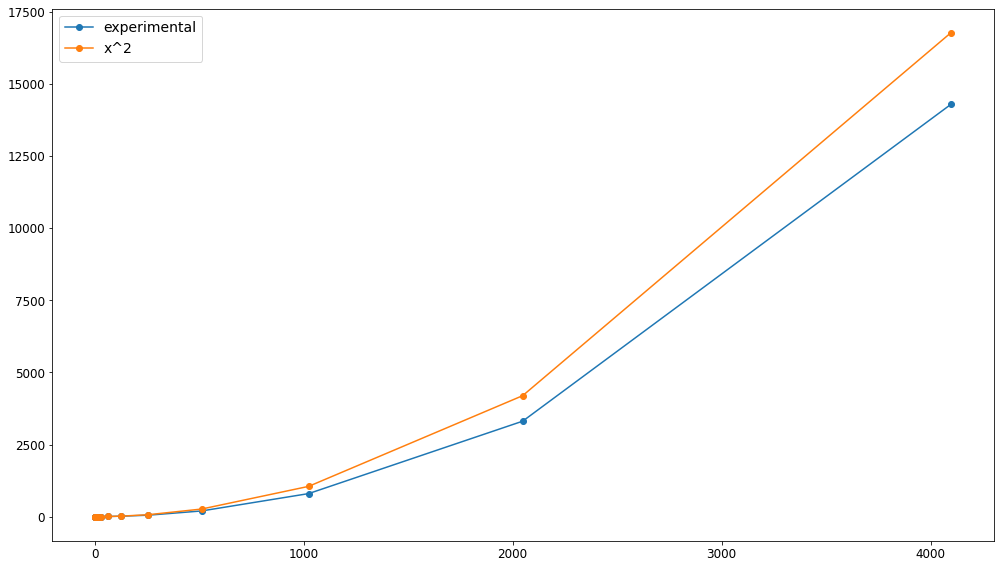

In [20]:
plt.plot(sizes, times, '-o', label='experimental')
plt.plot(sizes, [x ** 2 / 1e3 for x in sizes], '-o', label='x^2')
plt.legend()